### Predicting Employee Attrition at IBM

#### By Kevin Ba Ross

---

In [1]:
# Import the modules
import numpy as np
import pandas as pd
import tensorflow as tf

from pathlib import Path
from imblearn.metrics import classification_report_imbalanced

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import mba263
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = pd.read_csv(
    Path("IBM_attrition_data_set.csv"),
    index_col='EmployeeID', 
)

# Review the DataFrame
data.head()

,Attrition_binary,Age,JobSatisfaction,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,MaritalStatus,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,MonthlyIncome,PercentSalaryHike,children,Manager_relation_satisfaction
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,1,41,4,2,Life Sciences,2,Female,94,3,Single,...,1,6,4,0,5,Sales,5993,11,0,1
2,1,37,3,2,Other,4,Male,92,2,Single,...,3,0,0,0,0,Research & Development,2090,15,0,2
3,0,32,4,2,Life Sciences,4,Male,79,3,Single,...,2,7,7,3,6,Research & Development,3068,13,0,3
4,0,38,3,3,Life Sciences,4,Male,44,2,Single,...,3,9,7,1,8,Research & Development,9526,21,0,2
5,0,29,3,2,Life Sciences,4,Female,49,2,Single,...,3,9,5,0,8,Research & Development,4193,12,0,4


---

### Data Preparation

In [3]:
# Review the data types associated with the columns
data.dtypes

Attrition_binary                  int64
Age                               int64
JobSatisfaction                   int64
Education                         int64
EducationField                   object
EnvironmentSatisfaction           int64
Gender                           object
HourlyRate                        int64
JobInvolvement                    int64
MaritalStatus                    object
NumCompaniesWorked                int64
PerformanceRating                 int64
TotalWorkingYears                 int64
TrainingTimesLastYear             int64
WorkLifeBalance                   int64
YearsAtCompany                    int64
YearsInCurrentRole                int64
YearsSinceLastPromotion           int64
YearsWithCurrManager              int64
Department                       object
MonthlyIncome                     int64
PercentSalaryHike                 int64
children                          int64
Manager_relation_satisfaction     int64
dtype: object

In [4]:
# Create a list of categorical variables 
categorical_variables = list(data.dtypes[data.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['EducationField', 'Gender', 'MaritalStatus', 'Department']

In [5]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(data[categorical_variables])

In [6]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables) 
)

# Review the DataFrame
encoded_df.head()

,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [7]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
numerical_variables_df = data.drop(columns = categorical_variables)

# Review the DataFrame
numerical_variables_df.head()

,Attrition_binary,Age,JobSatisfaction,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,PercentSalaryHike,children,Manager_relation_satisfaction
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,1,41,4,2,2,94,3,8,3,8,0,1,6,4,0,5,5993,11,0,1
2,1,37,3,2,4,92,2,6,3,7,3,3,0,0,0,0,2090,15,0,2
3,0,32,4,2,4,79,3,0,3,8,2,2,7,7,3,6,3068,13,0,3
4,0,38,3,3,4,44,2,0,4,10,2,3,9,7,1,8,9526,21,0,2
5,0,29,3,2,4,49,2,0,3,10,3,3,9,5,0,8,4193,12,0,4


In [8]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
combined_data = pd.concat(
    [
        numerical_variables_df, 
        encoded_df
    ],
    axis=1 )

# Drop NaN value in the Dataframe
clean_data = combined_data.dropna()

# Display the data
clean_data

,Attrition_binary,Age,JobSatisfaction,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,...,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales
1,1.0,41.0,4.0,2.0,2.0,94.0,3.0,8.0,3.0,8.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,37.0,3.0,2.0,4.0,92.0,2.0,6.0,3.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,32.0,4.0,2.0,4.0,79.0,3.0,0.0,3.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,38.0,3.0,3.0,4.0,44.0,2.0,0.0,4.0,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,29.0,3.0,2.0,4.0,49.0,2.0,0.0,3.0,10.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,39.0,4.0,1.0,2.0,60.0,2.0,0.0,3.0,21.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1466,0.0,36.0,4.0,2.0,3.0,41.0,4.0,4.0,3.0,17.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1467,0.0,39.0,1.0,1.0,4.0,42.0,2.0,4.0,3.0,9.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,27.0,2.0,3.0,2.0,87.0,4.0,1.0,4.0,6.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
# Convert Monthly Income into per 1000

clean_data['MonthlyIncome'] = clean_data['MonthlyIncome']/1000

In [10]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = clean_data["Attrition_binary"]

# Separate the X variable, the features
X = clean_data.drop(columns="Attrition_binary")

In [11]:
# Check the balance of our target values
y.value_counts()

0.0    1232
1.0     237
Name: Attrition_binary, dtype: int64

In [12]:
print(f"Attrition out of {1232+237} = {237}, which is equivalent to {round(237/(1232+237)*100,1)}%.")

Attrition out of 1469 = 237, which is equivalent to 16.1%.


---

### Create a Logistic Regression Model

In [13]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [15]:
# Make a prediction using the testing data
testing_predictions = lr_model.predict(X_test)

In [16]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.578556263269639

**A Confusion Matrix**

In [17]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test, testing_predictions))

[[311   3]
 [ 45   9]]


**A Classification Report**

In [18]:
# Print the classification report for the model
print(classification_report_imbalanced(y_test, testing_predictions))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.87      0.99      0.17      0.93      0.41      0.18       314
        1.0       0.75      0.17      0.99      0.27      0.41      0.15        54

avg / total       0.86      0.87      0.29      0.83      0.41      0.17       368



---
#### Calculating odds ratios

In [19]:
result_logit_model = mba263.logit(y, X)

Optimization terminated successfully.
         Current function value: 0.363699
         Iterations 7


In [20]:
clean_data['predicted_logit_model'] = result_logit_model.predict()

In [21]:
clean_data['predicted_logit_model'].head()

1    0.487279
2    0.387083
3    0.089036
4    0.060051
5    0.074857
Name: predicted_logit_model, dtype: float64

In [56]:
# result_logit_model.summary()

In [57]:
# mba263.odds_ratios(result_logit_model)

### Odds Ratios Output from R
#### The odds ratios below are the output created by Professor Guilbeault

!['Odds Ratio Output'](IBM_odds_ratios_output.png)

---

#### Are there gender differences in the likelihood of attrition (or in employee job satisfaction)?

In [24]:
# Convert gender to dummy variable
data_gender_dummy = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data_gender_dummy.head()

,Attrition_binary,Age,JobSatisfaction,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,MaritalStatus,NumCompaniesWorked,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department,MonthlyIncome,PercentSalaryHike,children,Manager_relation_satisfaction,Gender_Male
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,1,41,4,2,Life Sciences,2,94,3,Single,8,...,6,4,0,5,Sales,5993,11,0,1,0
2,1,37,3,2,Other,4,92,2,Single,6,...,0,0,0,0,Research & Development,2090,15,0,2,1
3,0,32,4,2,Life Sciences,4,79,3,Single,0,...,7,7,3,6,Research & Development,3068,13,0,3,1
4,0,38,3,3,Life Sciences,4,44,2,Single,0,...,9,7,1,8,Research & Development,9526,21,0,2,1
5,0,29,3,2,Life Sciences,4,49,2,Single,0,...,9,5,0,8,Research & Development,4193,12,0,4,0


In [25]:
# Explore the likelihood of attrition based on gender - Male=1 Female=0
data_gender_attrition = data_gender_dummy.groupby('Gender_Male')['Attrition_binary'].mean()
data_gender_attrition

Gender_Male
0    0.147959
1    0.170068
Name: Attrition_binary, dtype: float64

---

#### Do levels of attrition (job satisfaction) vary by department?

<AxesSubplot:title={'center':'Likelihood of employee attrition for each department'}, ylabel='Department'>

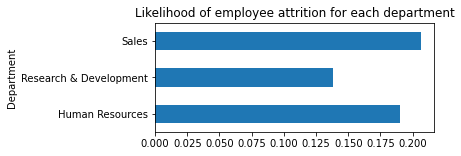

In [26]:
# Explore the likelihood of attrition based on department employees are working in
data_department_attrition_count = data.groupby('Department')['Attrition_binary'].count()
data_department_attrition_mean = data.groupby('Department')['Attrition_binary'].mean()
data_department_attrition_mean.plot(kind='barh', figsize=(5,2), title="Likelihood of employee attrition for each department")

---

#### Do levels of attrition (job satisfaction) vary by education level or education field?

<AxesSubplot:title={'center':'Likelihood of employee attrition for each education level'}, ylabel='Education'>

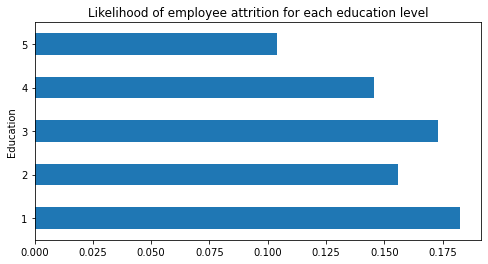

In [27]:
# Explore the likelihood of attrition based on education level
data_edu_level_attrition = data.groupby('Education')['Attrition_binary'].mean()
# Education 1 = Lowest 5 = Highest
data_edu_level_attrition.plot(kind='barh', figsize=(8,4), title="Likelihood of employee attrition for each education level")

<AxesSubplot:title={'center':'Likelihood of employee attrition for each educational field'}, ylabel='EducationField'>

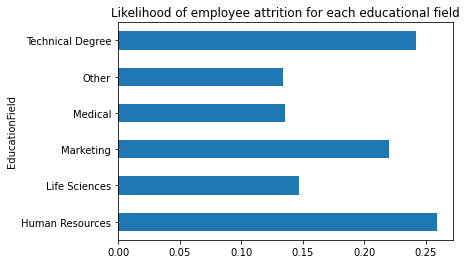

In [28]:
# Explore the likelihood of attrition based on educational field
data_edu_field_attrition = data.groupby('EducationField')['Attrition_binary'].mean()
data_edu_field_attrition.plot(kind='barh', title="Likelihood of employee attrition for each educational field")

---

#### Do levels of attrition (job satisfaction) vary as a function of an employee's marital status or the number of children they have?

<AxesSubplot:title={'center':'Likelihood of employee attrition for each marital status'}, ylabel='MaritalStatus'>

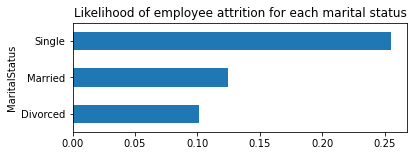

In [29]:
# Explore the likelihood of attrition based on marital status
data_marriage_attrition = data.groupby('MaritalStatus')['Attrition_binary'].mean()
data_marriage_attrition.plot(kind='barh', figsize=(6,2), title="Likelihood of employee attrition for each marital status")

<AxesSubplot:title={'center':'Likelihood of employee attrition for the number of children each employee has'}, ylabel='children'>

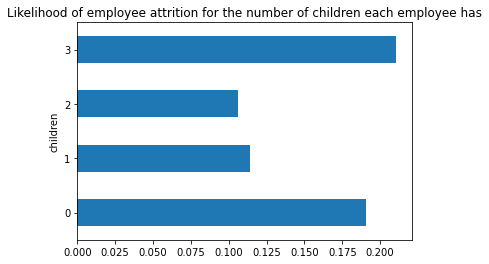

In [30]:
# Explore the likelihood of attrition based on the number of children each employee has
data_num_child_attrition = data.groupby('children')['Attrition_binary'].mean()
data_num_child_attrition.plot(kind='barh', title="Likelihood of employee attrition for the number of children each employee has")

---

#### Is attrition (or job satisfaction) predicted by employee's hourly pay rate, monthly income, or the most recent percent increase in their salary? If yes, is it a good predictor, or are there better predictors?

<AxesSubplot:title={'center':'Likelihood of employee attrition based on the most recent pay hike'}, ylabel='PercentSalaryHikeGroup'>

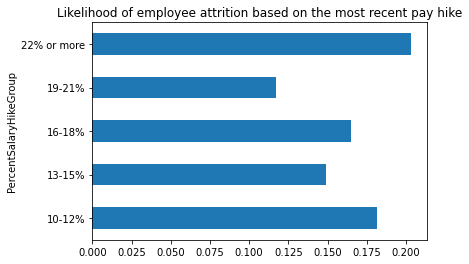

In [31]:
# Group the data for easier interpretation
bins = [0,13,16,19,22,100]
labels = ['10-12%','13-15%','16-18%','19-21%','22% or more']
data['PercentSalaryHikeGroup'] = pd.cut(data['PercentSalaryHike'], bins=bins, labels=labels, right=False)

# Explore the likelihood of attrition based on the most recent pay hike
data_percent_salary_hike_attrition = data.groupby('PercentSalaryHikeGroup')['Attrition_binary'].mean()
data_percent_salary_hike_attrition.plot(kind='barh', title="Likelihood of employee attrition based on the most recent pay hike")

<AxesSubplot:title={'center':'Likelihood of employee attrition based on employee hourly wage'}, ylabel='HourlyRateGroup'>

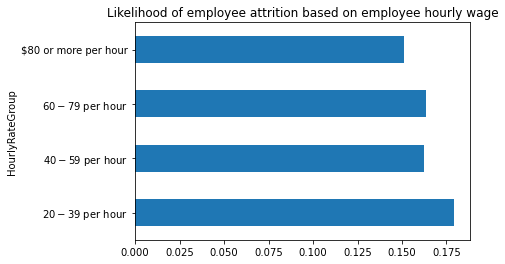

In [32]:
# Group the data for easier interpretation
bins = [0,40,60,80,1000]
labels = ['$20 - $39 per hour','$40 - $59 per hour','$60 - $79 per hour','$80 or more per hour']
data['HourlyRateGroup'] = pd.cut(data['HourlyRate'], bins=bins, labels=labels, right=False)

# Explore the likelihood of attrition based on hourly wage
data_hourly_rate_attrition = data.groupby('HourlyRateGroup')['Attrition_binary'].mean()
data_hourly_rate_attrition.plot(kind='barh', title="Likelihood of employee attrition based on employee hourly wage")

<AxesSubplot:title={'center':'Likelihood of employee attrition based on monthly income'}, ylabel='MonthlyIncomeGroup'>

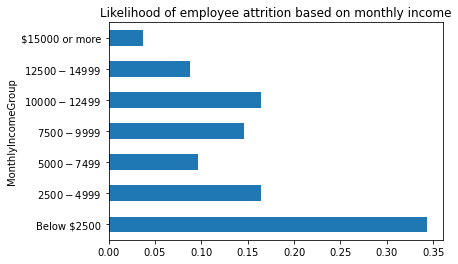

In [33]:
# Group the data for easier interpretation
bins = [0,2500,5000,7500,10000,12500,15000,50000]
labels = ['Below $2500','$2500 - $4999','$5000-$7499','$7500-$9999','$10000-$12499','$12500-$14999','$15000 or more']
data['MonthlyIncomeGroup'] = pd.cut(data['MonthlyIncome'], bins=bins, labels=labels, right=False)

# Explore the likelihood of attrition based on monthly income
data_monthly_income_attrition = data.groupby('MonthlyIncomeGroup')['Attrition_binary'].mean()
data_monthly_income_attrition.plot(kind='barh', title='Likelihood of employee attrition based on monthly income')

In [34]:
# Explore the number of employee in each group
count_income_group = data.groupby('MonthlyIncomeGroup').count()
count_income_group['MonthlyIncome']

MonthlyIncomeGroup
Below $2500       224
$2500 - $4999     525
$5000-$7499       310
$7500-$9999       130
$10000-$12499      91
$12500-$14999      57
$15000 or more    133
Name: MonthlyIncome, dtype: int64

---

#### Do levels of attrition (job satisfaction) vary as a function of an employee's performance?

<AxesSubplot:title={'center':'Likelihood of employee attrition based on performance rating'}, ylabel='PerformanceRating'>

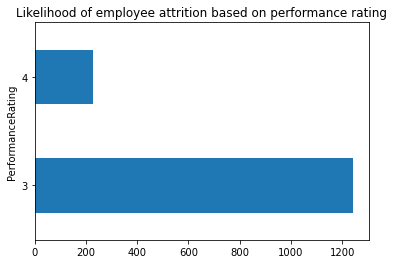

In [35]:
# Explore the likelihood of attrition based on performance rating
data_performance_attrition = data.groupby('PerformanceRating')['Attrition_binary'].count()
data_performance_attrition.plot(kind='barh', title="Likelihood of employee attrition based on performance rating")

In [36]:
# Explore the number of employee in each group
data.groupby('PerformanceRating')['Attrition_binary'].count()

PerformanceRating
3    1244
4     226
Name: Attrition_binary, dtype: int64

<AxesSubplot:title={'center':'Likelihood of employee attrition based on job involvement'}, ylabel='JobInvolvement'>

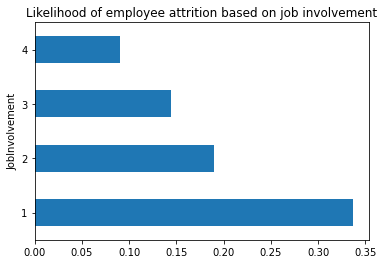

In [37]:
# Explore the likelihood of attrition based on job involvement
data_attrition_JobInvolvement = data.groupby('JobInvolvement')['Attrition_binary'].mean()
data_attrition_JobInvolvement.plot(kind='barh', title="Likelihood of employee attrition based on job involvement")

In [38]:
# Explore the number of employee in each group
data.groupby('JobInvolvement')['Attrition_binary'].count()

JobInvolvement
1     83
2    375
3    868
4    144
Name: Attrition_binary, dtype: int64

---

#### Do levels of attrition (job satisfaction) vary as a function of the quality of an emplyee's work environment, as measured by employee's self-reported "EnvironmentSatisfaction", "WorkLifeBalance", and overall relationship with their manager (measured by the "Manager_relation_satisfaction" variable)

<AxesSubplot:title={'center':'Likelihood of employee attrition based on their environment satisfaction rating'}, ylabel='EnvironmentSatisfaction'>

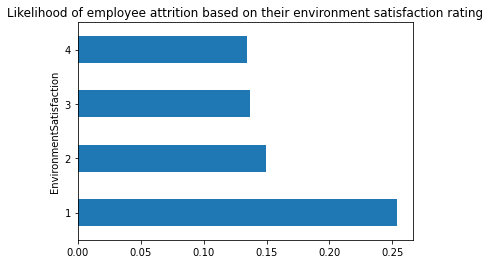

In [39]:
# Explore the likelihood of attrition based on environment satisfaction rating
data_attrition_environment_satisfaction = data.groupby('EnvironmentSatisfaction')['Attrition_binary'].mean()
data_attrition_environment_satisfaction.plot(kind='barh', title="Likelihood of employee attrition based on their environment satisfaction rating")

<AxesSubplot:title={'center':'Likelihood of employee attrition based on their manager relation satisfaction rating'}, ylabel='Manager_relation_satisfaction'>

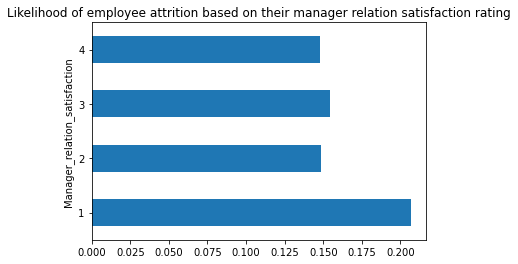

In [40]:
# Explore the likelihood of attrition based on manager relation satisfaction rating
data_attrition_manager_relation_satisfaction = data.groupby('Manager_relation_satisfaction')['Attrition_binary'].mean()
data_attrition_manager_relation_satisfaction.plot(kind='barh', title="Likelihood of employee attrition based on their manager relation satisfaction rating")

<AxesSubplot:title={'center':'Likelihood of employee attrition based on their work-life balance rating'}, ylabel='WorkLifeBalance'>

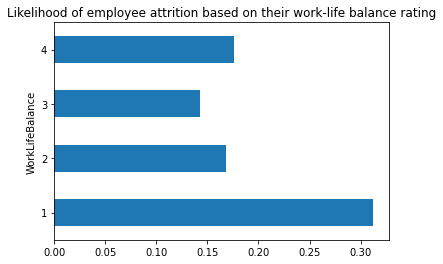

In [41]:
# Explore the likelihood of attrition based on work-life balance rating
data_attrition_work_life_balance = data.groupby('WorkLifeBalance')['Attrition_binary'].mean()
data_attrition_work_life_balance.plot(kind='barh', title="Likelihood of employee attrition based on their work-life balance rating")

In [42]:
# Logistic regression and odds ratios for this category only
# result_logit_happiness = mba263.logit(data['Attrition_binary'],data[['EnvironmentSatisfaction','Manager_relation_satisfaction','WorkLifeBalance']])

In [43]:
# data['predicted_happiness'] = result_logit_happiness.predict()

In [44]:
# data['predicted_happiness']

In [45]:
# result_logit_happiness.summary()

In [46]:
# Summary of odds ratios
# mba263.odds_ratios(result_logit_happiness)

---

#### Does having a recent promotion succeed in reducing attrition (or increasing job satisfaction)?

In [47]:
# Group the data for easier interpretation
bins = [0,2,4,9,100]
labels = ['0-1 year','2-3 years','4-8 years','9 years or more']
data['YearPromoGroup'] = pd.cut(data['YearsSinceLastPromotion'], bins=bins, labels=labels, right=False)

In [48]:
# Explore the number of employee in each group
data.groupby('YearPromoGroup')['Attrition_binary'].count()

YearPromoGroup
0-1 year           938
2-3 years          211
4-8 years          232
9 years or more     89
Name: Attrition_binary, dtype: int64

<AxesSubplot:title={'center':'Likelihood of employee attrition based on the recency of last promotion'}, ylabel='YearPromoGroup'>

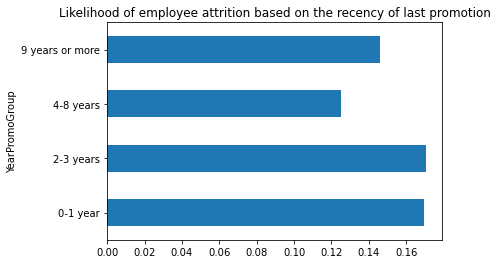

In [49]:
# Explore the likelihood of attrition based on the recency of last promotion
data_attrition_promotion = data.groupby('YearPromoGroup')['Attrition_binary'].mean()
data_attrition_promotion.plot(kind='barh', title="Likelihood of employee attrition based on the recency of last promotion")

---

#### How do levels of attrition (job satisfaction) vary as a function of the number of years that an employee has spent at the company, or of the number of years an employee has worked with their manager?

**Likelihood of employee attrition based on years employee spent working at IBM**

In [50]:
# Group the data for easier interpretation
bins = [0,10,20,30,100]
labels = ['0-9 years','10-19 years','20-29 years','30 years or more']
data['YearsAtCompanyGroup'] = pd.cut(data['YearsAtCompany'], bins=bins, labels=labels, right=False)

In [51]:
# Explore the number of employee in each group
data.groupby('YearsAtCompanyGroup')['Attrition_binary'].count()

YearsAtCompanyGroup
0-9 years           1104
10-19 years          273
20-29 years           76
30 years or more      17
Name: Attrition_binary, dtype: int64

<AxesSubplot:title={'center':'Likelihood of employee attrition based on the number of years employee spent working at IBM'}, ylabel='YearsAtCompanyGroup'>

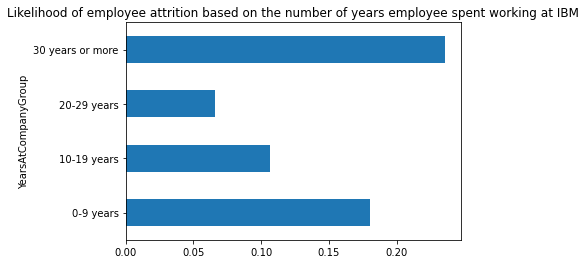

In [52]:
# Explore the likelihood of attrition based on the number of years employee spent working at IBM
data_attrition_YearsAtCompany = data.groupby('YearsAtCompanyGroup')['Attrition_binary'].mean()
data_attrition_YearsAtCompany.plot(kind='barh', title="Likelihood of employee attrition based on the number of years employee spent working at IBM")

**Likelihood of employee attrition based on years with current manager at IBM**

In [53]:
# Group the data for easier interpretation
bins = [0,3,6,9,100]
labels = ['0-2 years','3-5 years','6-8 years','9 years or more']
data['YearsWithCurrManagerGroup'] = pd.cut(data['YearsWithCurrManager'], bins=bins, labels=labels, right=False)

In [54]:
# Explore the number of employee in each group
data.groupby('YearsWithCurrManagerGroup')['Attrition_binary'].count()

YearsWithCurrManagerGroup
0-2 years          683
3-5 years          271
6-8 years          352
9 years or more    164
Name: Attrition_binary, dtype: int64

<AxesSubplot:title={'center':'Likelihood of employee attrition based on the number of years with current manager at IBM'}, ylabel='YearsWithCurrManagerGroup'>

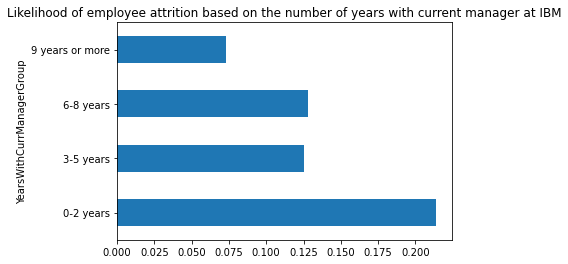

In [55]:
# Explore the likelihood of attrition based on the number of years with current manager at IBM
data_attrition_YearsWithCurrManager = data.groupby('YearsWithCurrManagerGroup')['Attrition_binary'].mean()
data_attrition_YearsWithCurrManager.plot(kind='barh', title="Likelihood of employee attrition based on the number of years with current manager at IBM")